In [23]:
import pandas as pd
df = pd.read_csv('aapl1.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2020-06-23,366.53,53038870,364.000,372.38,362.2701
2020-06-22,358.87,33861320,351.340,359.46,351.1500
2020-06-19,349.72,66118950,354.635,356.56,345.1500
2020-06-18,351.73,24205100,351.410,353.45,349.2200
2020-06-17,351.59,28601630,355.150,355.40,351.0900


In [24]:
df.dtypes

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [25]:
df['2020-01-07':'2020-01-01']

,Close,Volume,Open,High,Low
Date,,,,,
2020-01-07,298.39,27877660,299.84,300.90,297.48
2020-01-06,299.80,29644640,293.79,299.96,292.75
2020-01-03,297.43,36633880,297.15,300.58,296.50
2020-01-02,300.35,33911860,296.24,300.60,295.19


## Monthly DATA

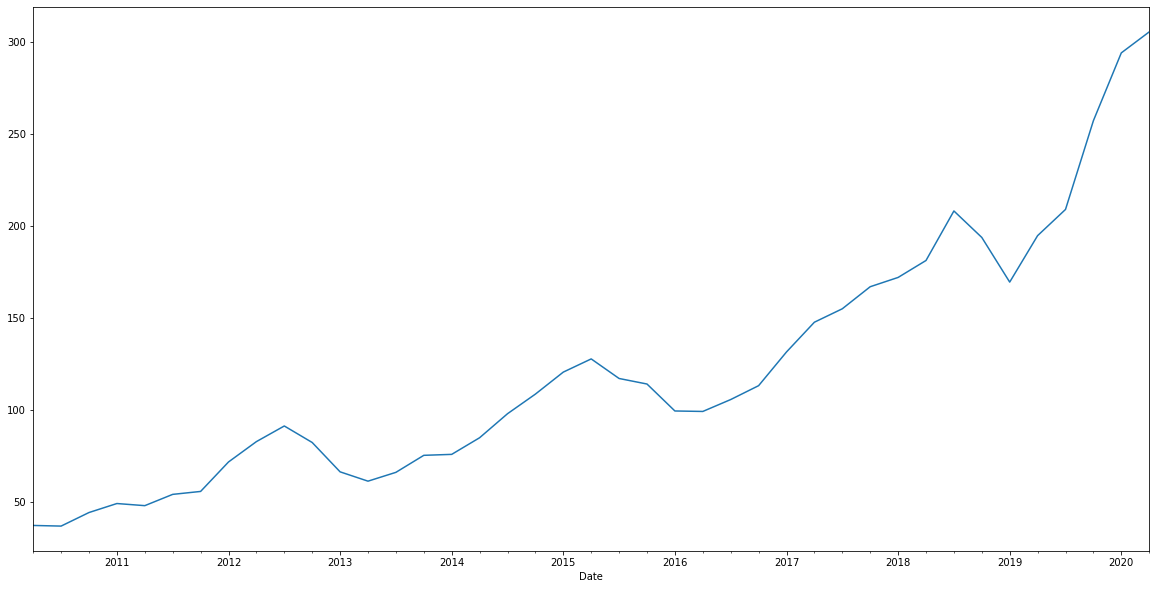

In [26]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
#df.Close.resample('Q').mean().plot(kind = 'bar')
df.Close.resample('Q').mean().plot()

# Exercice ------------------------------------------------------------------------------------------------

In [27]:
wmt = pd.read_csv('wmt.csv')
wmt

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [28]:
wmt.set_index('Line Item', inplace=True)
wmt

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [29]:
wmt = wmt.T
wmt

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [30]:
wmt.index = pd.PeriodIndex(wmt.index, freq='Q-JAN')
wmt.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [31]:
wmt['start date'] = wmt.index.map(lambda x : x.start_time)
wmt

Line Item,Revenue,Expenses,Profit,start date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [32]:
wmt['end date'] = wmt.index.map(lambda x : x.end_time )
wmt

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [33]:
wmt['end date'] = wmt['end date'].dt.date

In [34]:
wmt

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30


# -------------------------------------------------------------------------------------------------------------

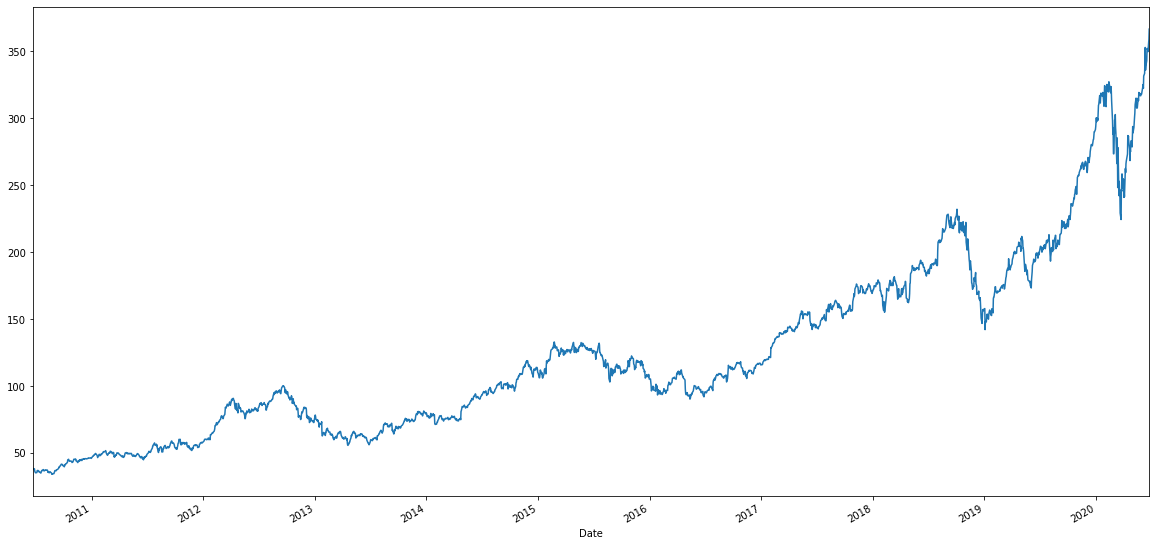

In [35]:
df.Close.plot(figsize=(20,10))

In [36]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
import matplotlib.pyplot as plt
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2020-06-23,366.53,53038870,364.000,372.38,362.2701
2020-06-22,358.87,33861320,351.340,359.46,351.1500
2020-06-19,349.72,66118950,354.635,356.56,345.1500
2020-06-18,351.73,24205100,351.410,353.45,349.2200
2020-06-17,351.59,28601630,355.150,355.40,351.0900


In [37]:
# Get the nhumber of Trading days
df.shape

(2517, 5)

# ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

#### The following data partitioning methods have been suggested in several literatures in the field of Machine learning/ Pattern recognition:
a). 70% of the entire Dataset for training (Training data)
b). 15% of the entire Dataset for validation (Validation data)
c). 15% of the entire Dataset for testing (Testing data)

### 1. Evaluate ARIMA Model

This approach involves the following steps:

1-Split the dataset into training and test sets.
2-Walk the time steps in the test dataset.
    Train an ARIMA model.
    Make a one-step prediction.
    Store prediction; get and store actual observation.
3-Calculate error score for predictions compared to expected values

In [39]:
dfQ = dfc.resample('Q').mean()
dfQ.head()

,Close
Date,
2010-06-30,37.477140
2010-09-30,37.129280
2010-12-31,44.499222
2011-03-31,49.383308
2011-06-30,48.230314


In [40]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size:], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(dfQ.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=14293.489
ARIMA(0, 0, 1) MSE=4262.957
ARIMA(0, 1, 0) MSE=476.980
ARIMA(0, 1, 1) MSE=459.631
ARIMA(0, 1, 2) MSE=556.741
ARIMA(0, 1, 3) MSE=1004.781
ARIMA(0, 2, 0) MSE=627.161
ARIMA(0, 2, 1) MSE=745.421
ARIMA(0, 2, 2) MSE=454.971
ARIMA(0, 2, 3) MSE=556.147
ARIMA(1, 0, 0) MSE=611.530
ARIMA(1, 1, 0) MSE=479.145
ARIMA(1, 2, 0) MSE=626.286
ARIMA(2, 0, 0) MSE=559.370
ARIMA(2, 1, 0) MSE=510.249
ARIMA(2, 1, 1) MSE=590.420
ARIMA(2, 2, 0) MSE=744.121
ARIMA(2, 2, 1) MSE=630.181
ARIMA(3, 0, 0) MSE=601.143
ARIMA(3, 1, 0) MSE=641.279
ARIMA(3, 2, 0) MSE=761.538
ARIMA(3, 2, 1) MSE=612.987
ARIMA(3, 2, 2) MSE=564.569
ARIMA(4, 0, 0) MSE=742.712
ARIMA(4, 1, 0) MSE=560.155
ARIMA(4, 1, 1) MSE=708.924
ARIMA(4, 1, 2) MSE=978.703
ARIMA(4, 2, 0) MSE=604.363
ARIMA(4, 2, 1) MSE=600.653
ARIMA(5, 0, 0) MSE=665.186
ARIMA(5, 1, 0) MSE=608.044
ARIMA(5, 1, 1) MSE=628.782
ARIMA(5, 2, 0) MSE=624.650
ARIMA(5, 2, 1) MSE=653.677
Best ARIMA(0, 2, 2) MSE=454.971


# 6.3 Review Residual Errors
### Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

               0
count  11.000000
mean    5.291792
std    22.056219
min   -31.764961
25%    -4.990643
50%     6.150377
75%    17.585650
max    46.503685


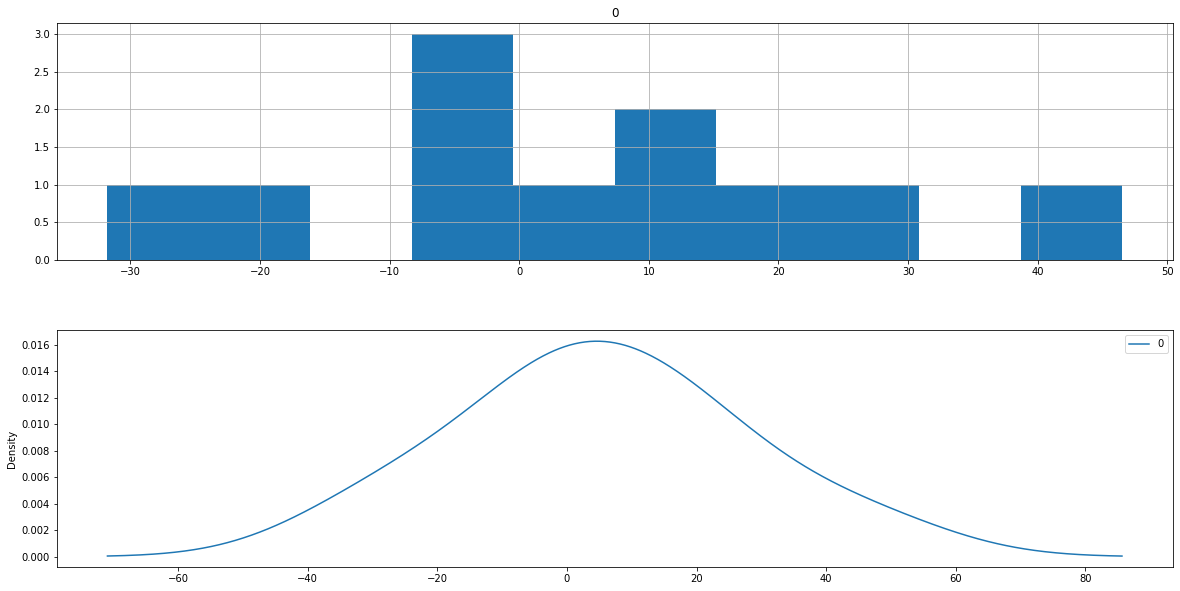

In [19]:
from matplotlib import pyplot
from pandas import DataFrame
# prepare data
X = dfQ.values
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,2,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

### We could use this information to bias-correct predictions by adding the mean residual error of 5.291792 to each forecast made.

                  0
count  1.100000e+01
mean  -2.656169e-08
std    2.205622e+01
min   -3.705675e+01
25%   -1.028244e+01
50%    8.585852e-01
75%    1.229386e+01
max    4.121189e+01


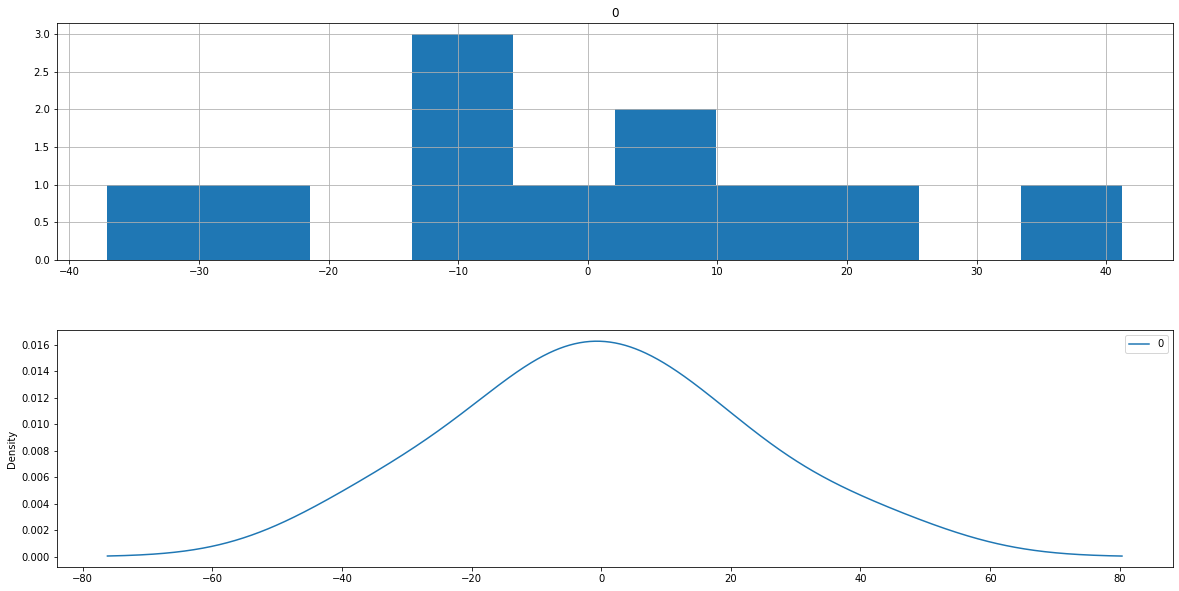

In [20]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas import DataFrame
# prepare data
X = dfQ.values
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 5.291792
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,2,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot residual errors
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

## Finally, density plots of the residual error do show a small shift towards zero. mean  -2.656169e-08



# Model Validation

#### After models have been developed and a final model selected, it must be validated and finalized.
#### Validation is an optional part of the process, but one that provides a ‘last check’ to ensure we have not fooled or misled ourselves.

This section includes the following steps:
1-Finalize Model: Train and save the final model.
2-Make Prediction: Load the finalized model and make a prediction.
3-Validate Model: Load and validate the final model.

In [21]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# prepare data
X = dfQ.values
# fit model
model = ARIMA(X, order=(0,2,2))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 5.291792
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

# Make Prediction

In [22]:
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 320.281
